# My Apple Health

### Importing libraries

In [11]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

###  Reading the file

In [8]:
# create element tree object 
tree = ET.parse('export.xml') 

# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])

# value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

# shorter observation names: use vectorized replace function
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')


### Creating a date column that doesn't include the time, convert to date type

splitting after date column

In [14]:
data['date'] = [d.date() for d in data['creationDate']]

create new column and split info to exclude time

In [64]:
data['creationDate'] = pd.to_datetime(data['creationDate'])
data['date'] = pd.to_datetime(data['date'])

### Bodymass trend

Subsetting for type, date an value

In [65]:
type_date_value = data[["type", "date","value"]]

Selecting bodymass type

In [66]:
body_mass_only = type_date_value[(data["type"] == "BodyMass")]

Plotting a graph

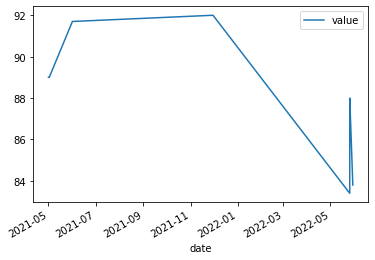

In [18]:
import matplotlib.pyplot as plt
body_mass_only.plot(x="date", y="value", kind="line")
plt.show()

### What are all the types of data captured and what is their median value?

In [19]:
data.groupby("type")["value"].median()

type
ActiveEnergyBurned                  0.377000
AppleExerciseTime                   1.000000
AppleStandHour                      1.000000
AppleStandTime                      2.000000
AppleWalkingSteadiness              1.000000
AudioExposureEvent                  1.000000
BasalEnergyBurned                   0.336000
BodyMass                           88.500000
DistanceCycling                     0.002558
DistanceSwimming                   25.000000
DistanceWalkingRunning              0.011206
EnvironmentalAudioExposure         64.201200
FlightsClimbed                      2.000000
HKDataTypeSleepDurationGoal         8.000000
HeadphoneAudioExposure             64.499500
HeadphoneAudioExposureEvent         1.000000
HeartRate                          89.000000
HeartRateVariabilitySDNN           41.479700
Height                              5.839900
MindfulSession                      1.000000
OxygenSaturation                    0.970000
RespiratoryRate                    16.000000
Resti

### Graph of your heartrate variability over the last month

In [67]:
HRV = type_date_value[(data["type"] == "HeartRateVariabilitySDNN")]

In [68]:
#HRV = HRV.set_index('date').sort_index()
HRV_month = HRV.loc['2022-06-10':'2022-07-11']

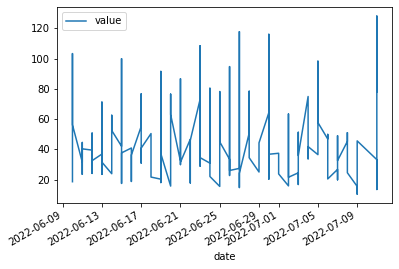

In [54]:
import matplotlib.pyplot as plt
HRV_month.plot(y="value", kind="line")
plt.show()